In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


file_path = "../input/massiforiginaldataset/"

/kaggle/input/massiforiginaldataset/20130620.logDWH.complex.txt
/kaggle/input/massiforiginaldataset/20130619.logDWH.complex.txt


In [2]:
df1 = pd.read_csv(file_path + "20130619.logDWH.complex.txt", sep="\t", header=None) 
df1 = df1.dropna(axis=1, how='all')
df1 = df1.drop([20], axis=1)
df1.columns=["C"+str(i) for i in range(1, len(df1.columns) + 1)]
df1['Send Date'] = pd.to_datetime(df1['C15']).dt.date
df1['Send Time'] = pd.to_datetime(df1['C15']).dt.time
df1['Receive Date'] = pd.to_datetime(df1['C16']).dt.date
df1['Receive Time'] = pd.to_datetime(df1['C16']).dt.time
df1 = df1.drop(['C15','C16'], axis=1)
df1.columns=["C"+str(i) for i in range(1, len(df1.columns) + 1)]
df1


# column_names = list(df1)
# column_names

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22
0,N-RegC2C,PN_EU_3_4,PN_EU_0_883,EUAcc3_4,EUAcc0_883,68897.74,Ind,SU,1.000000e+08,9.993041e+07,...,True,True,EUAcc3_4,C2C201161.099,EU,EU,2011-01-06,00:09:00,2011-01-06,00:09:00
1,N-RegC2C,PN_EU_1_139,PN_EU_0_754,EUAcc1_139,EUAcc0_754,68945.47,Ind,SU,1.000000e+08,9.993037e+07,...,True,True,EUAcc1_139,C2C201161.01515,EU,EU,2011-01-06,00:15:00,2011-01-06,00:15:00
2,N-RegDep,PN_Ret2,PN_EU_3_17,RAcc2,EUAcc3_17,9715.41,Dt,SU,1.000000e+09,9.999903e+08,...,True,True,RAcc2,Dp201161.02222,RET,EU,2011-01-06,00:22:00,2011-01-06,00:22:00
3,N-RegDep,PN_Ret1,PN_EU_0_266,RAcc1,EUAcc0_266,79303.74,Dt,SU,1.000000e+09,9.999207e+08,...,True,True,RAcc1,Dp201161.02222,RET,EU,2011-01-06,00:22:00,2011-01-06,00:22:00
4,N_Reg_RC,PN_EU_0_905,operator,EUAcc0_905,A0,929.92,ArRC,SU,1.000000e+08,9.999907e+07,...,True,True,EUAcc0_905,Rc201161.02929,EU,operator,2011-01-06,00:29:00,2011-01-06,00:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54843,N_Reg_RC,PN_EU_0_251,operator,EUAcc0_251,A0,2526.72,ArRC,SU,9.994135e+07,9.993883e+07,...,True,True,EUAcc0_251,Rc2011101.05858,EU,operator,2011-01-10,00:58:00,2011-01-10,00:58:00
54844,N-RegC2C,PN_EU_3_23,PN_EU_1_192,EUAcc3_23,EUAcc1_192,201189.66,Ind,SU,9.894231e+07,9.873911e+07,...,True,True,EUAcc3_23,C2C2011101.122,EU,EU,2011-01-10,01:02:00,2011-01-10,01:02:00
54845,N_Reg_Merch,PN_EU_2_4,PN_MER2,EUAcc2_4,MAcc2,172744.66,Merchant,SU,9.838227e+07,9.820952e+07,...,True,True,EUAcc2_4,PM2011101.133,EU,MER,2011-01-10,01:03:00,2011-01-10,01:03:00
54846,N_Reg_RC,PN_EU_0_235,operator,EUAcc0_235,A0,6692.26,ArRC,SU,9.965911e+07,9.965242e+07,...,True,True,EUAcc0_235,Rc2011101.144,EU,operator,2011-01-10,01:04:00,2011-01-10,01:04:00


In [3]:
df1['C1'].value_counts()

N_Reg_RC       28312
N-RegDep       12867
N-RegC2C        7484
N_RegWith       4064
F_bot            721
F-Mule-With      717
N_Reg_Merch      443
F_SevWith        240
Name: C1, dtype: int64

In [4]:
df1.isnull().values.any()

False

In [5]:
df2 = pd.read_csv(file_path + "20130620.logDWH.complex.txt", sep="|", header=None) 
df2 = df2.dropna(axis=1, how='all')
df2 = df2.drop([22], axis=1)
df2.columns=["C"+str(i) for i in range(1, len(df2.columns) + 1)]
df2['Send Date'] = pd.to_datetime(df2['C15']).dt.date
df2['Send Time'] = pd.to_datetime(df2['C15']).dt.time
df2['Receive Date'] = pd.to_datetime(df2['C16']).dt.date
df2['Receive Time'] = pd.to_datetime(df2['C16']).dt.time
df2 = df2.drop(['C15','C16'], axis=1)
df2.columns=["C"+str(i) for i in range(1, len(df2.columns) + 1)]
df2


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22
0,N-RegDep,PN_Ret2,PN_EU_0_261,RAcc2,EUAcc0_261,131926.49,Dt,SU,1.000000e+09,9.998681e+08,...,True,True,RAcc2,Dp201161.01111,RET,EU,2011-01-06,00:11:22,2011-01-06,00:11:22
1,N_Reg_RC,PN_EU_1_502,operator,EUAcc1_502,A0,2054.46,ArRC,SU,1.000000e+08,9.999795e+07,...,True,True,EUAcc1_502,Rc201161.01616,EU,operator,2011-01-06,00:16:08,2011-01-06,00:16:08
2,N-RegDep,PN_Ret2,PN_EU_1_362,RAcc2,EUAcc1_362,182548.74,Dt,SU,9.998681e+08,9.996855e+08,...,True,True,RAcc2,Dp201161.03636,RET,EU,2011-01-06,00:36:47,2011-01-06,00:36:47
3,N_Reg_RC,PN_EU_1_26,operator,EUAcc1_26,A0,5507.28,ArRC,SU,1.000000e+08,9.999449e+07,...,True,True,EUAcc1_26,Rc201161.03636,EU,operator,2011-01-06,00:36:59,2011-01-06,00:36:59
4,N_Reg_RC,PN_EU_1_18,operator,EUAcc1_18,A0,2102.60,ArRC,SU,1.000000e+08,9.999790e+07,...,True,True,EUAcc1_18,Rc201161.111,EU,operator,2011-01-06,01:01:26,2011-01-06,01:01:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54217,N_Reg_RC,PN_EU_0_116,operator,EUAcc0_116,A0,524.70,ArRC,SU,9.999828e+07,9.999775e+07,...,True,True,EUAcc0_116,Rc2011930.233030,EU,operator,2011-09-30,23:30:00,2011-09-30,23:30:00
54218,N_Reg_RC,PN_EU_0_1256,operator,EUAcc0_1256,A0,2106.86,ArRC,SU,9.998486e+07,9.998276e+07,...,True,True,EUAcc0_1256,Rc2011930.233232,EU,operator,2011-09-30,23:32:19,2011-09-30,23:32:19
54219,N-RegDep,PN_Ret6,PN_EU_1_143,RAcc6,EUAcc1_143,213240.93,Dt,SU,8.785127e+08,8.782994e+08,...,True,True,RAcc6,Dp2011930.233333,RET,EU,2011-09-30,23:33:23,2011-09-30,23:33:23
54220,N-RegC2C,PN_EU_1_197,PN_EU_2_85,EUAcc1_197,EUAcc2_85,199431.78,Ind,SU,9.755577e+07,9.735435e+07,...,True,True,EUAcc1_197,C2C2011930.233838,EU,EU,2011-09-30,23:38:05,2011-09-30,23:38:05


In [6]:
df2.isnull().values.any()

False

In [7]:
df2['C6'].value_counts()

2770.29     4
489.83      3
2072.08     3
271.84      3
550.52      3
           ..
1564.06     1
2082.92     1
5486.38     1
3057.36     1
87364.76    1
Name: C6, Length: 53482, dtype: int64

In [8]:
fullData = pd.concat([df1, df2], ignore_index=True)
fullData = fullData.drop(['C15'], axis=1)
fullData.columns=["C"+str(i) for i in range(1, len(fullData.columns) + 1)]
fullData

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21
0,N-RegC2C,PN_EU_3_4,PN_EU_0_883,EUAcc3_4,EUAcc0_883,68897.74,Ind,SU,1.000000e+08,9.993041e+07,...,1.000000e+08,True,True,C2C201161.099,EU,EU,2011-01-06,00:09:00,2011-01-06,00:09:00
1,N-RegC2C,PN_EU_1_139,PN_EU_0_754,EUAcc1_139,EUAcc0_754,68945.47,Ind,SU,1.000000e+08,9.993037e+07,...,1.000000e+08,True,True,C2C201161.01515,EU,EU,2011-01-06,00:15:00,2011-01-06,00:15:00
2,N-RegDep,PN_Ret2,PN_EU_3_17,RAcc2,EUAcc3_17,9715.41,Dt,SU,1.000000e+09,9.999903e+08,...,1.000000e+08,True,True,Dp201161.02222,RET,EU,2011-01-06,00:22:00,2011-01-06,00:22:00
3,N-RegDep,PN_Ret1,PN_EU_0_266,RAcc1,EUAcc0_266,79303.74,Dt,SU,1.000000e+09,9.999207e+08,...,1.000000e+08,True,True,Dp201161.02222,RET,EU,2011-01-06,00:22:00,2011-01-06,00:22:00
4,N_Reg_RC,PN_EU_0_905,operator,EUAcc0_905,A0,929.92,ArRC,SU,1.000000e+08,9.999907e+07,...,9.898650e+07,True,True,Rc201161.02929,EU,operator,2011-01-06,00:29:00,2011-01-06,00:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109065,N_Reg_RC,PN_EU_0_116,operator,EUAcc0_116,A0,524.70,ArRC,SU,9.999828e+07,9.999775e+07,...,1.886421e+08,True,True,Rc2011930.233030,EU,operator,2011-09-30,23:30:00,2011-09-30,23:30:00
109066,N_Reg_RC,PN_EU_0_1256,operator,EUAcc0_1256,A0,2106.86,ArRC,SU,9.998486e+07,9.998276e+07,...,1.886426e+08,True,True,Rc2011930.233232,EU,operator,2011-09-30,23:32:19,2011-09-30,23:32:19
109067,N-RegDep,PN_Ret6,PN_EU_1_143,RAcc6,EUAcc1_143,213240.93,Dt,SU,8.785127e+08,8.782994e+08,...,1.006837e+08,True,True,Dp2011930.233333,RET,EU,2011-09-30,23:33:23,2011-09-30,23:33:23
109068,N-RegC2C,PN_EU_1_197,PN_EU_2_85,EUAcc1_197,EUAcc2_85,199431.78,Ind,SU,9.755577e+07,9.735435e+07,...,1.019741e+08,True,True,C2C2011930.233838,EU,EU,2011-09-30,23:38:05,2011-09-30,23:38:05


In [9]:
# selecting and remaning columns that will be further used in the graph

data = fullData
data = fullData.drop(columns=['C13', 'C14', 'C20', 'C21'], axis=1)




In [10]:
data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C15,C16,C17,C18,C19
0,N-RegC2C,PN_EU_3_4,PN_EU_0_883,EUAcc3_4,EUAcc0_883,68897.74,Ind,SU,1.000000e+08,9.993041e+07,1.000689e+08,1.000000e+08,C2C201161.099,EU,EU,2011-01-06,00:09:00
1,N-RegC2C,PN_EU_1_139,PN_EU_0_754,EUAcc1_139,EUAcc0_754,68945.47,Ind,SU,1.000000e+08,9.993037e+07,1.000689e+08,1.000000e+08,C2C201161.01515,EU,EU,2011-01-06,00:15:00
2,N-RegDep,PN_Ret2,PN_EU_3_17,RAcc2,EUAcc3_17,9715.41,Dt,SU,1.000000e+09,9.999903e+08,1.000097e+08,1.000000e+08,Dp201161.02222,RET,EU,2011-01-06,00:22:00
3,N-RegDep,PN_Ret1,PN_EU_0_266,RAcc1,EUAcc0_266,79303.74,Dt,SU,1.000000e+09,9.999207e+08,1.000793e+08,1.000000e+08,Dp201161.02222,RET,EU,2011-01-06,00:22:00
4,N_Reg_RC,PN_EU_0_905,operator,EUAcc0_905,A0,929.92,ArRC,SU,1.000000e+08,9.999907e+07,9.898743e+07,9.898650e+07,Rc201161.02929,EU,operator,2011-01-06,00:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109065,N_Reg_RC,PN_EU_0_116,operator,EUAcc0_116,A0,524.70,ArRC,SU,9.999828e+07,9.999775e+07,1.886426e+08,1.886421e+08,Rc2011930.233030,EU,operator,2011-09-30,23:30:00
109066,N_Reg_RC,PN_EU_0_1256,operator,EUAcc0_1256,A0,2106.86,ArRC,SU,9.998486e+07,9.998276e+07,1.886448e+08,1.886426e+08,Rc2011930.233232,EU,operator,2011-09-30,23:32:19
109067,N-RegDep,PN_Ret6,PN_EU_1_143,RAcc6,EUAcc1_143,213240.93,Dt,SU,8.785127e+08,8.782994e+08,1.008969e+08,1.006837e+08,Dp2011930.233333,RET,EU,2011-09-30,23:33:23
109068,N-RegC2C,PN_EU_1_197,PN_EU_2_85,EUAcc1_197,EUAcc2_85,199431.78,Ind,SU,9.755577e+07,9.735435e+07,1.021736e+08,1.019741e+08,C2C2011930.233838,EU,EU,2011-09-30,23:38:05


In [11]:
# remane columns appropriately
data.columns = ['Ground_Truth', 'User_ID_Sender', 'User_ID_Receiver', 'Sender_account_ID', 'Receiver_account_ID', 'Transaction_Amount',
               'Type_of_Transaction', 'State_of_Transaction', 'Sender_Balance_before', 'Receiver_Balance_before', 'Sender_Balance_after', 'Receiver_Balance_after', 
               'Sender_account_ID_N', 'Sender_type', 'Receiver_type', 'Date', 'Time']



In [12]:
data['Ground_Truth'].str.strip()

0         N-RegC2C
1         N-RegC2C
2         N-RegDep
3         N-RegDep
4         N_Reg_RC
            ...   
109065    N_Reg_RC
109066    N_Reg_RC
109067    N-RegDep
109068    N-RegC2C
109069    N-RegDep
Name: Ground_Truth, Length: 109070, dtype: object

In [13]:
value_ = data['Ground_Truth'].str.strip()
data['Ground_Truth'] = value_


In [14]:
data

,Ground_Truth,User_ID_Sender,User_ID_Receiver,Sender_account_ID,Receiver_account_ID,Transaction_Amount,Type_of_Transaction,State_of_Transaction,Sender_Balance_before,Receiver_Balance_before,Sender_Balance_after,Receiver_Balance_after,Sender_account_ID_N,Sender_type,Receiver_type,Date,Time
0,N-RegC2C,PN_EU_3_4,PN_EU_0_883,EUAcc3_4,EUAcc0_883,68897.74,Ind,SU,1.000000e+08,9.993041e+07,1.000689e+08,1.000000e+08,C2C201161.099,EU,EU,2011-01-06,00:09:00
1,N-RegC2C,PN_EU_1_139,PN_EU_0_754,EUAcc1_139,EUAcc0_754,68945.47,Ind,SU,1.000000e+08,9.993037e+07,1.000689e+08,1.000000e+08,C2C201161.01515,EU,EU,2011-01-06,00:15:00
2,N-RegDep,PN_Ret2,PN_EU_3_17,RAcc2,EUAcc3_17,9715.41,Dt,SU,1.000000e+09,9.999903e+08,1.000097e+08,1.000000e+08,Dp201161.02222,RET,EU,2011-01-06,00:22:00
3,N-RegDep,PN_Ret1,PN_EU_0_266,RAcc1,EUAcc0_266,79303.74,Dt,SU,1.000000e+09,9.999207e+08,1.000793e+08,1.000000e+08,Dp201161.02222,RET,EU,2011-01-06,00:22:00
4,N_Reg_RC,PN_EU_0_905,operator,EUAcc0_905,A0,929.92,ArRC,SU,1.000000e+08,9.999907e+07,9.898743e+07,9.898650e+07,Rc201161.02929,EU,operator,2011-01-06,00:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109065,N_Reg_RC,PN_EU_0_116,operator,EUAcc0_116,A0,524.70,ArRC,SU,9.999828e+07,9.999775e+07,1.886426e+08,1.886421e+08,Rc2011930.233030,EU,operator,2011-09-30,23:30:00
109066,N_Reg_RC,PN_EU_0_1256,operator,EUAcc0_1256,A0,2106.86,ArRC,SU,9.998486e+07,9.998276e+07,1.886448e+08,1.886426e+08,Rc2011930.233232,EU,operator,2011-09-30,23:32:19
109067,N-RegDep,PN_Ret6,PN_EU_1_143,RAcc6,EUAcc1_143,213240.93,Dt,SU,8.785127e+08,8.782994e+08,1.008969e+08,1.006837e+08,Dp2011930.233333,RET,EU,2011-09-30,23:33:23
109068,N-RegC2C,PN_EU_1_197,PN_EU_2_85,EUAcc1_197,EUAcc2_85,199431.78,Ind,SU,9.755577e+07,9.735435e+07,1.021736e+08,1.019741e+08,C2C2011930.233838,EU,EU,2011-09-30,23:38:05


[Text(0.5, 144.58333333333348, 'State of Transaction'),
 Text(1422.6969696969695, 0.5, 'Count')]

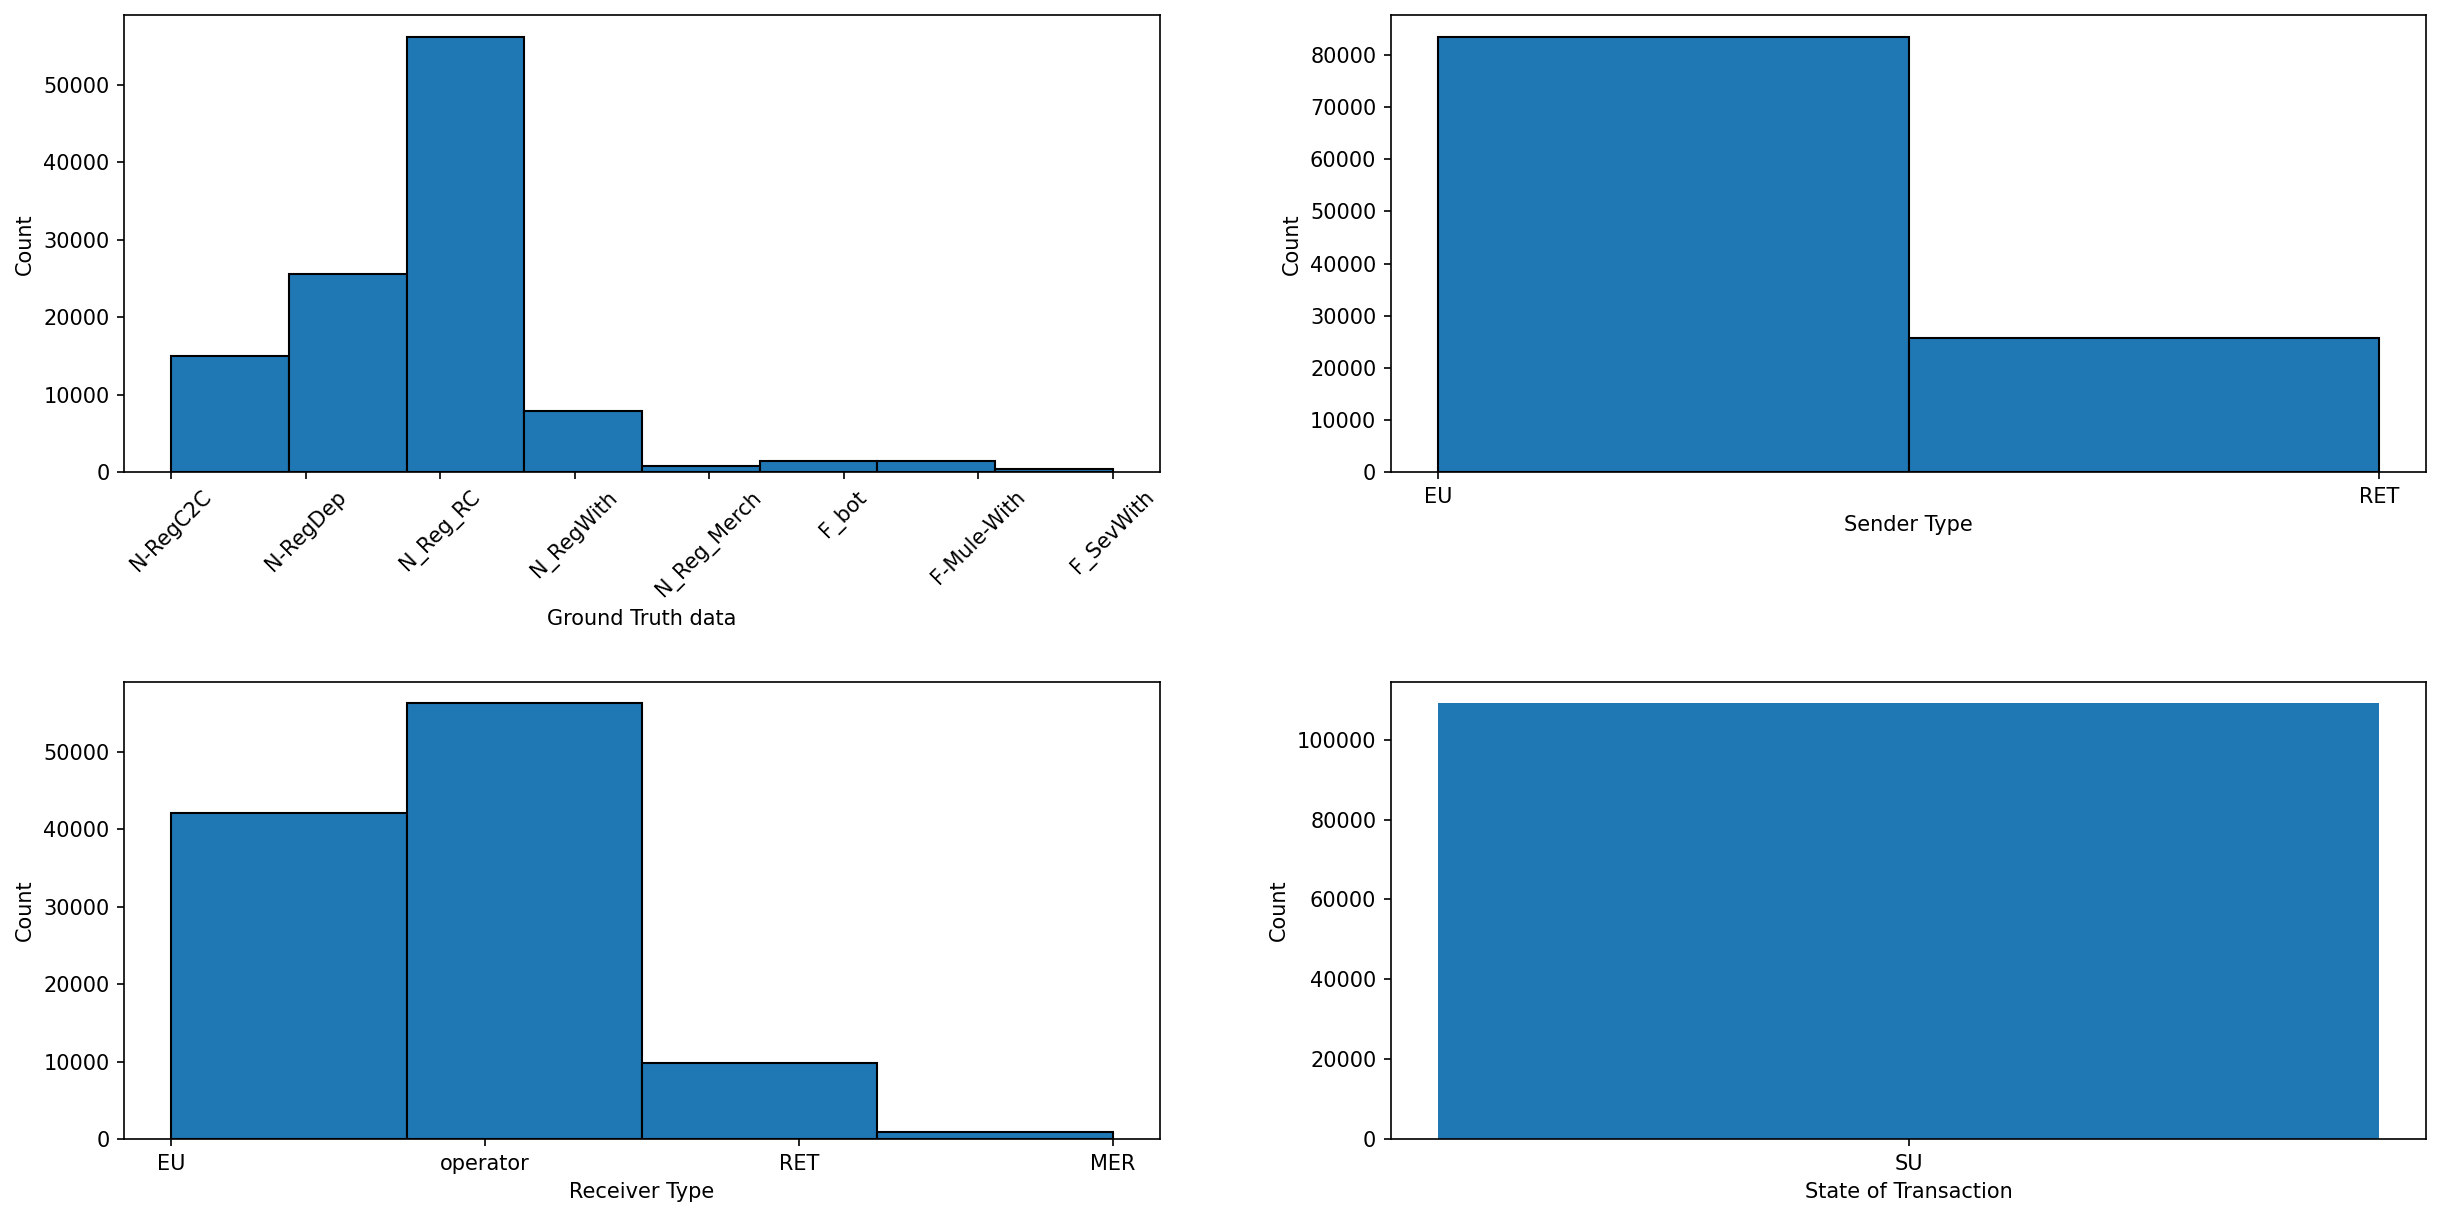

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10), dpi=150)
fig.tight_layout(pad=8.0)

ax1.hist(data['Ground_Truth'], bins = 8, edgecolor='black')
ax1.tick_params(axis='x', rotation=45)
ax1.set(xlabel='Ground Truth data', ylabel='Count')
ax2.hist(data['Sender_type'], bins=2, edgecolor='black')
ax2.set(xlabel='Sender Type', ylabel='Count')
ax3.hist(data['Receiver_type'], bins=4, edgecolor='black')
ax3.set(xlabel='Receiver Type', ylabel='Count')
ax4.hist(data['State_of_Transaction'], bins=1)
ax4.set(xlabel='State of Transaction', ylabel='Count')

In [16]:
data.describe()

,Transaction_Amount,Sender_Balance_before,Receiver_Balance_before,Sender_Balance_after,Receiver_Balance_after
count,1.090700e+05,1.090700e+05,1.090700e+05,1.090700e+05,1.090700e+05
mean,5.402783e+04,2.959383e+08,2.958841e+08,1.991858e+08,1.991317e+08
std,8.652721e+04,3.541994e+08,3.541638e+08,2.352991e+08,2.352747e+08
min,2.800000e-01,7.427993e+07,7.371724e+07,2.599640e+04,3.358000e+01
25%,2.241842e+03,9.994631e+07,9.992851e+07,1.007190e+08,1.006196e+08
50%,6.552720e+03,1.000888e+08,1.000757e+08,1.188030e+08,1.188002e+08
75%,7.916185e+04,1.024074e+08,1.023903e+08,1.636371e+08,1.636360e+08
max,1.148351e+06,1.000910e+09,1.000900e+09,1.000910e+09,1.000659e+09


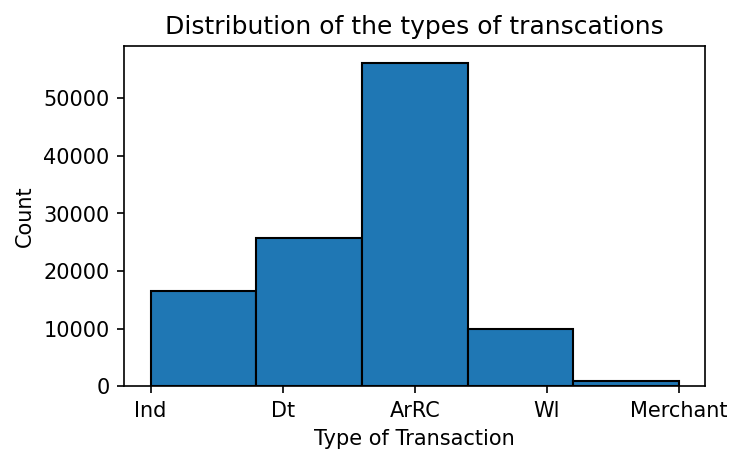

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
ax.hist(data['Type_of_Transaction'], bins = 5, edgecolor='black')
ax.set_xlabel('Type of Transaction')
ax.set_ylabel('Count')
ax.set_title('Distribution of the types of transcations')
plt.show()



In [18]:
data['Transaction_Amount'].describe()

count    1.090700e+05
mean     5.402783e+04
std      8.652721e+04
min      2.800000e-01
25%      2.241842e+03
50%      6.552720e+03
75%      7.916185e+04
max      1.148351e+06
Name: Transaction_Amount, dtype: float64

[Text(0.5, 144.58333333333348, 'Transaction Amount'),
 Text(131.33333333333331, 0.5, '')]

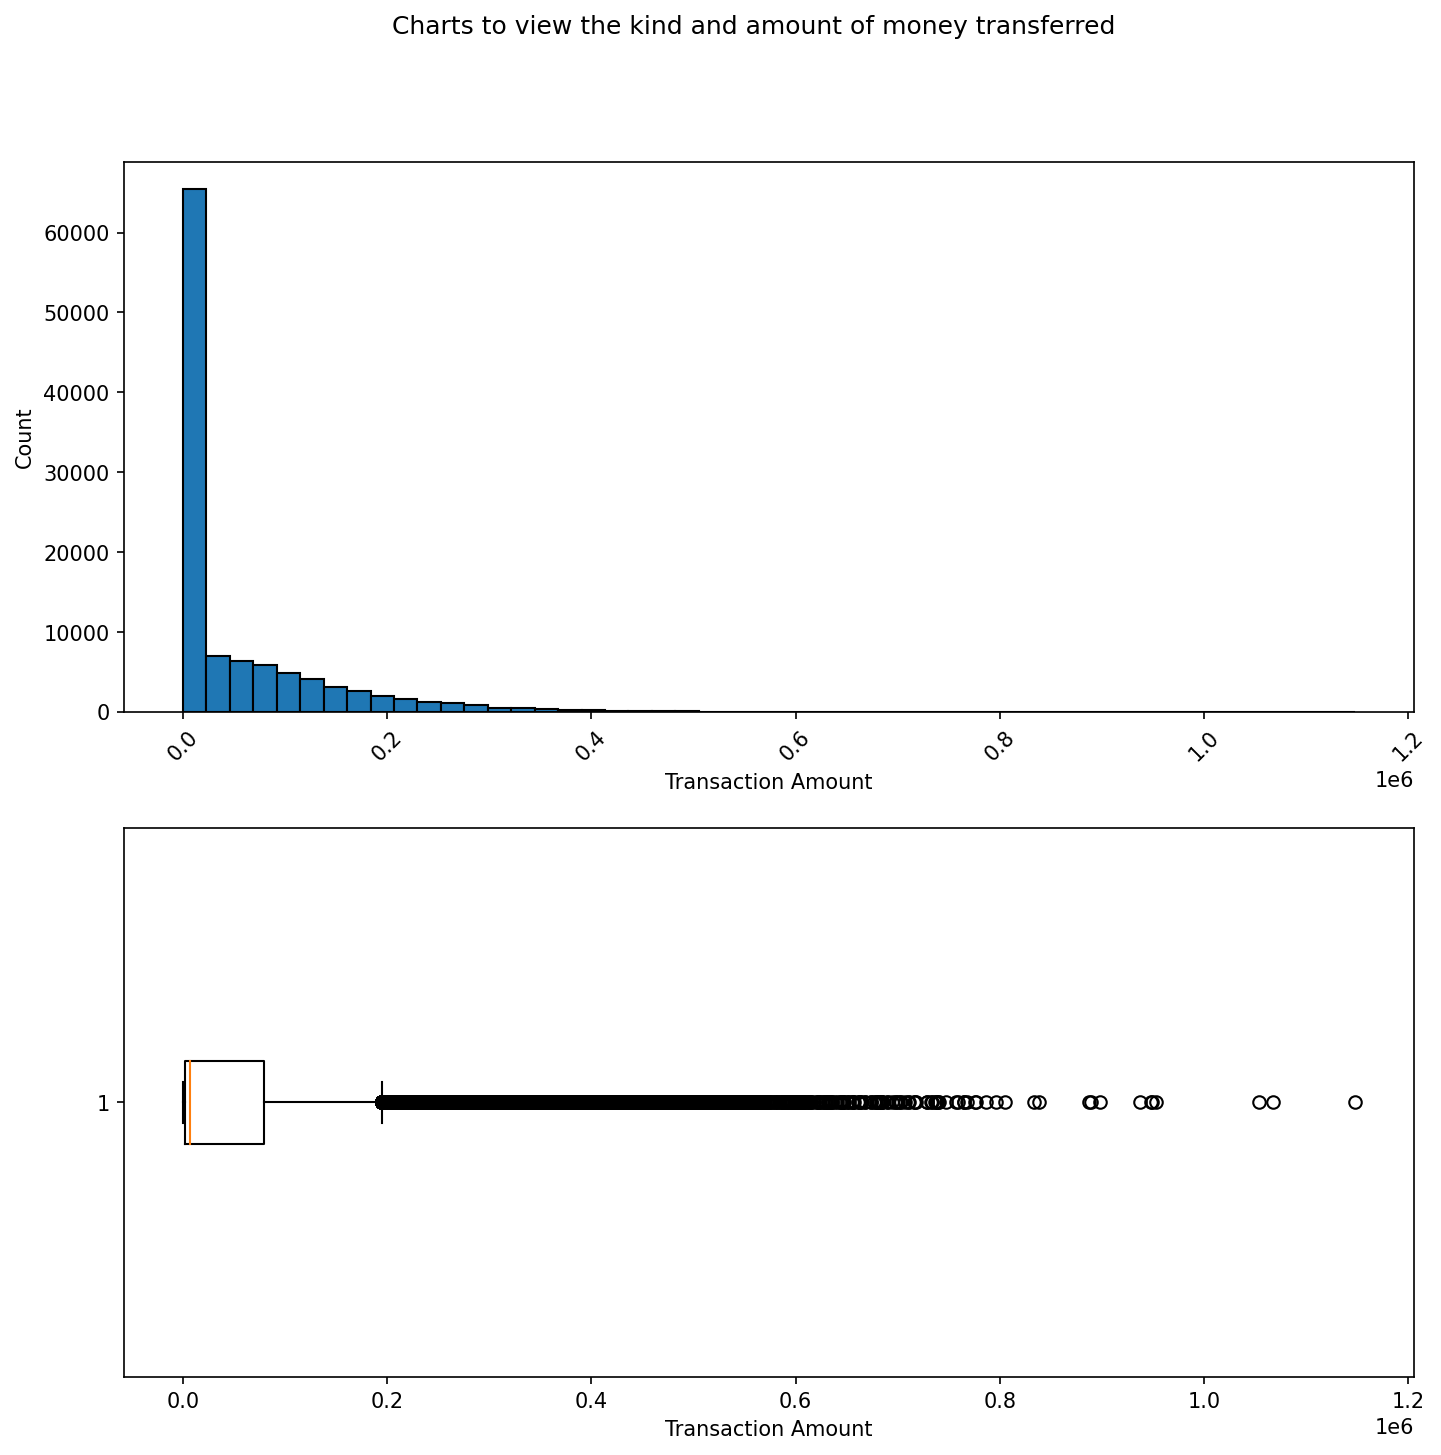

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), dpi=150)
fig.suptitle('Charts to view the kind and amount of money transferred')
fig.tight_layout(pad=3.5)

ax1.hist((data['Transaction_Amount']), bins = 50, edgecolor='black')
ax1.tick_params(axis='x' ,rotation=45)
# ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# ax1.set_xlim([6000, 1150000])
# ax1.set_xlim([0, 1150000])
ax1.set(xlabel='Transaction Amount',ylabel='Count')

ax2.boxplot(data['Transaction_Amount'], vert=False)
ax2.set(xlabel='Transaction Amount',ylabel='')




In [20]:
# to check which transaction amount occurs most

print(data['Transaction_Amount'].value_counts().sort_index())

# This shows that very small amounts of money are transferred.. as little as 0.28 , I guess this explains why the histogram has more values for amounts closer to
# But then, the boxplot shows lots of 'outliers' which is strange to me. Perhaps those are the non-fradulent transactions because they occur less and are typically higher



0.28          1
0.32          1
0.44          1
0.52          1
0.59          1
             ..
949252.59     1
952737.33     1
1053512.86    1
1067770.21    1
1148351.48    1
Name: Transaction_Amount, Length: 106311, dtype: int64


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109070 entries, 0 to 109069
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Ground_Truth             109070 non-null  object 
 1   User_ID_Sender           109070 non-null  object 
 2   User_ID_Receiver         109070 non-null  object 
 3   Sender_account_ID        109070 non-null  object 
 4   Receiver_account_ID      109070 non-null  object 
 5   Transaction_Amount       109070 non-null  float64
 6   Type_of_Transaction      109070 non-null  object 
 7   State_of_Transaction     109070 non-null  object 
 8   Sender_Balance_before    109070 non-null  float64
 9   Receiver_Balance_before  109070 non-null  float64
 10  Sender_Balance_after     109070 non-null  float64
 11  Receiver_Balance_after   109070 non-null  float64
 12  Sender_account_ID_N      109070 non-null  object 
 13  Sender_type              109070 non-null  object 
 14  Rece

In [22]:
# checking to see if there are null values

data.isnull().values.any()

False

In [23]:
# ndata = data[['User_ID_Sender', 'User_ID_Receiver', 'Transaction_Amount']]

In [24]:
# ! pip install pyvis

In [25]:
# Network Graph

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [26]:
from bokeh.io import output_notebook, show, save
from bokeh.models import ColumnDataSource
output_notebook()

Loading BokehJS ...

In [27]:
G = nx.from_pandas_edgelist(data, source = 'Sender_account_ID', target = 'Receiver_account_ID', edge_attr = 'Transaction_Amount')

In [28]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2009
Number of edges: 10923
Average degree:  10.8741


In [29]:
data1 = data.loc[(data['Receiver_account_ID'] != 'A0') & (data['Transaction_Amount'] <= data['Transaction_Amount'].mode().iloc[0]) & (data['Ground_Truth'] == 'F_bot')]
GML = nx.from_pandas_edgelist(data1, source = 'Sender_account_ID', target = 'Receiver_account_ID', edge_attr = 'Transaction_Amount')

In [30]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, NodesAndLinkedEdges, Plot, MultiLine, TapTool, HoverTool, CustomJS, Dropdown
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx, show

In [31]:
title = 'All Transactions between Sender and Receiver'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("User", "@index")]


#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-15.1, 15.1), y_range=Range1d(-15.1, 15.1), title=title, width=750, height=750)

plot.add_tools(TapTool())


#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))
botnet_graph = from_networkx(GML, nx.spring_layout, scale=10, center=(0,0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=7, fill_color='skyblue')
network_graph.node_renderer.hover_glyph = Circle(size=7, fill_color=Spectral4[1])
network_graph.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])

botnet_graph.node_renderer.glyph = Circle(size=7, fill_color='red')
botnet_graph.node_renderer.hover_glyph = Circle(size=7, fill_color=Spectral4[3])
botnet_graph.node_renderer.selection_glyph = Circle(size=20, fill_color=Spectral4[2])

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.25, line_width=0.7, line_color='grey')
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)

botnet_graph.edge_renderer.glyph = MultiLine(line_alpha=0.8, line_width=2, line_color='red')
botnet_graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)
botnet_graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)

network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

# menu = [("Item 1", "item_1"), ("Item 2", "item_2"), None, ("Item 3", "item_3")]
# dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)
# dropdown.js_on_event("menu_item_click", CustomJS(code="console.log('dropdown: ' + this.item, this.toString())"))

# show(dropdown)

#Add network graph to the plot
plot.renderers.append(network_graph)
plot.renderers.append(botnet_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [32]:
# data['Transaction_Amount'].mode().iloc[0]
data['Transaction_Amount'].mode()


0     398.81
1     584.07
2    2770.29
dtype: float64

In [33]:
# to check how often senders make transactions
# the account ID: RAcc5 has the most sent transaction counts

data['Sender_account_ID'].value_counts()

RAcc5         4346
RAcc4         4340
RAcc3         4298
RAcc1         4268
RAcc2         4266
              ... 
EUAcc0_208       6
EUAcc0_353       5
EUAcc0_261       5
EUAcc0_361       4
EUAcc0_173       4
Name: Sender_account_ID, Length: 1955, dtype: int64

In [34]:
# to check how often receivers receive transactions
# the account ID: A0 has the most received transaction counts - It turns out that this ID belongs to an 'operator' so it is expected to have so many transactions

data['Receiver_account_ID'].value_counts()

A0             56213
RAcc5           1822
RAcc4           1693
RAcc6           1677
RAcc2           1661
               ...  
EUAcc0_63          1
EUAcc0_550         1
EUAcc0_856         1
EUAcc0_1086        1
EUAcc0_327         1
Name: Receiver_account_ID, Length: 1855, dtype: int64

In [35]:
data['User_ID_Receiver'].value_counts()

operator        56213
PN_Ret5          1822
PN_Ret4          1693
PN_Ret6          1677
PN_Ret2          1661
                ...  
PN_EU_0_63          1
PN_EU_0_550         1
PN_EU_0_856         1
PN_EU_0_1086        1
PN_EU_0_327         1
Name: User_ID_Receiver, Length: 1855, dtype: int64

In [36]:
title = 'Suspected Money Laundering Transactions'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("User", "@index")]


#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title, width=750, height=750)

plot.add_tools(TapTool())

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(GML, nx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=7, fill_color='skyblue')
network_graph.node_renderer.hover_glyph = Circle(size=7, fill_color=Spectral4[1])
network_graph.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.8, line_width=2, line_color='red')
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)

network_graph.selection_policy = NodesAndLinkedEdges()

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [37]:
# G = nx.from_pandas_edgelist(data, source = 'Sender_account_ID', target = 'Receiver_account_ID', edge_attr = 'Transaction_Amount')

In [38]:
# #Choose a title!
# title = 'Transactions'

# #Establish which categories will appear when hovering over each node
# HOVER_TOOLTIPS = [("User", "@index")]

# #Create a plot — set dimensions, toolbar, and title
# plot = figure(tooltips = HOVER_TOOLTIPS,
#               tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
#             x_range=Range1d(-20.1, 20.1), y_range=Range1d(-20.1, 20.1), title=title)

# #Create a network graph object with spring layout
# # https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
# network_graph = from_networkx(G1, networkx.spring_layout, scale=10, center=(0, 0))

# #Set node size and color
# network_graph.node_renderer.glyph = Circle(size=10, fill_color='skyblue')

# #Set edge opacity and width
# network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

# #Add network graph to the plot
# plot.renderers.append(network_graph)

# show(plot)
# #save(plot, filename=f"{title}.html")

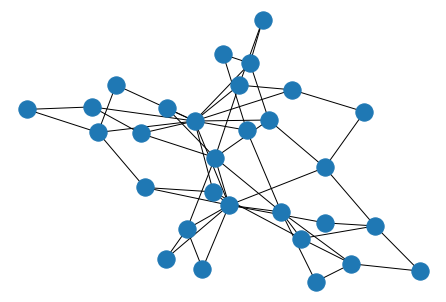

In [39]:
# test network visualization

import networkx as nx
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(30,2)
nx.draw_spring(G)